Імпортуємо необхідні бібліотеки

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


Завантаження та попередня обробка даних (індекси - 0, 30, 60)

In [35]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шляхи до директорій
train_dir = "C:/Users/anton/Downloads/101_food_classes_10_percent/train"
test_dir = "C:/Users/anton/Downloads/101_food_classes_10_percent/test"

# Список всіх класів, відсортований за алфавітом
all_classes = sorted(os.listdir(train_dir))

# Вибираємо класи з індексами 0, 30, 60
selected_classes = [all_classes[0], all_classes[30], all_classes[60]]

print("Selected classes:", selected_classes)

# Створення генераторів для тренування та тестування
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes  # Вибрані класи
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    classes=selected_classes  # Вибрані класи
)




Selected classes: ['apple_pie', 'deviled_eggs', 'lobster_bisque']
Found 225 images belonging to 3 classes.


Found 750 images belonging to 3 classes.


Побудова моделі

In [30]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 класи
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Тренування моделі

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.3889 - loss: 3.2373 - val_accuracy: 0.3302 - val_loss: 1.0786
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3125 - loss: 1.0796 - val_accuracy: 0.5000 - val_loss: 1.0435
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.3698 - loss: 1.0808 - val_accuracy: 0.4253 - val_loss: 1.0845
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3750 - loss: 1.0789 - val_accuracy: 0.5714 - val_loss: 1.0667
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5106 - loss: 1.0329 - val_accuracy: 0.6033 - val_loss: 0.9460
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6562 - loss: 0.9410 - val_accuracy: 0.6429 - val_loss: 0.8347
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5838 - loss: 0.8472 - val_accuracy: 0.6766 - val_loss: 0.8177
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6562 - loss: 0.9083 - val_accuracy: 0.4286 - val_loss: 0.9908
Epoc

Оцінка моделі та графіки

23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.5351 - loss: 1.0294
Test accuracy: 0.5353260636329651


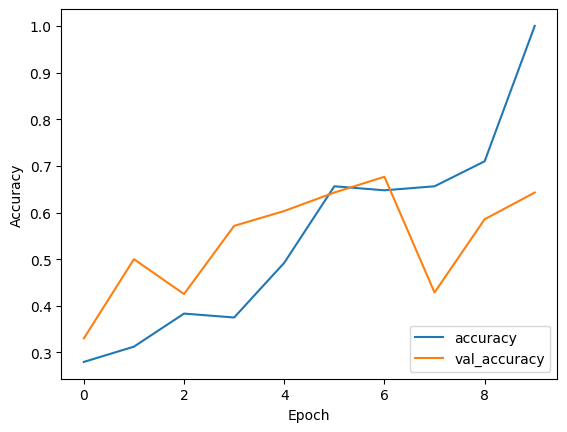

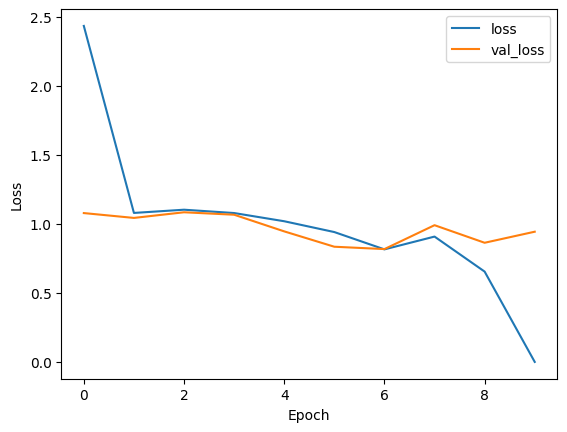

In [32]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // 32)
print(f"Test accuracy: {test_acc}")

# Графіки точності та втрат
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
